<a href="https://colab.research.google.com/github/lilianaochoae/VENTAS_FARMACEUTICAS_ATC/blob/main/01_Avance__proyecto_VentasFarmaceuticas_ATC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librería

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de base de datos

In [18]:
columns_dtypes = {'Weekday Name' : 'category',
                  'M01AB' : 'category',
                  'M01AE' : 'category',
                  'N02BA' : 'category',
                  'N02BE' : 'category',
                  'N05B' : 'category',
                  'N05C' : 'category',
                  'R03' : 'category',
                  'R06' : 'category'}

In [19]:
Bd = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRiMza5_x6BjMer567tJwgC75IBpQpE_ZQFtz_wQXB7U4aEC8Aq9D-rpIZIhC8IH5acJRy-tEGiUXFB/pub?output=csv')

In [20]:
print (Bd.shape)

(50532, 13)


El dataset contiene 50532 observaciones y 13 columnas

# Porcentaje de valores faltantes en columnas

In [21]:
k = Bd.isna().sum()
((round(k[k!=0]/Bd.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

Series([], dtype: object)

In [22]:
base = Bd

# Limpieza de los Datos

In [23]:
#HotEncoding en la variable Weekday Name
dummy_WeekdayName = pd.get_dummies(Bd["Weekday Name"], prefix = "Weekday Name")
dummy_WeekdayName.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["Weekday Name"], axis = 1)
Bd = pd.concat([Bd,dummy_WeekdayName], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,dia,año,hora,Weekday Name_Friday,Weekday Name_Monday,Weekday Name_Saturday,Weekday Name_Sunday,Weekday Name_Thursday,Weekday Name_Tuesday,Weekday Name_Wednesday
0,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,1,2,2014,8:00,0,0,0,0,1,0,0
1,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,1,2,2014,9:00,0,0,0,0,1,0,0
2,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,1,2,2014,10:00,0,0,0,0,1,0,0
3,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,1,2,2014,11:00,0,0,0,0,1,0,0
4,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,1,2,2014,12:00,0,0,0,0,1,0,0


In [24]:
#HotEncoding en la variable dia
dummy_dia = pd.get_dummies(Bd["dia"], prefix = "dia")
dummy_dia.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["dia"], axis = 1)
Bd = pd.concat([Bd,dummy_dia], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,año,...,dia_22,dia_23,dia_24,dia_25,dia_26,dia_27,dia_28,dia_29,dia_30,dia_31
0,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,1,2014,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#HotEncoding en la variable mes	
dummy_mes	= pd.get_dummies(Bd["mes"], prefix = "mes")
dummy_mes.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["mes"], axis = 1)
Bd = pd.concat([Bd,dummy_mes], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,año,hora,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,2014,8:00,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,2014,9:00,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,2014,10:00,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,2014,11:00,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,2014,12:00,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#HotEncoding en la variable año	
dummy_año	= pd.get_dummies(Bd["año"], prefix = "año")
dummy_año.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["año"], axis = 1)
Bd = pd.concat([Bd,dummy_año], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,hora,Weekday Name_Friday,...,mes_9,mes_10,mes_11,mes_12,año_2014,año_2015,año_2016,año_2017,año_2018,año_2019
0,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,8:00,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,9:00,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,10:00,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,11:00,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,12:00,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
#HotEncoding en la variable hora
dummy_hora = pd.get_dummies(Bd["hora"], prefix = "hora")
dummy_hora.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["hora"], axis = 1)
Bd = pd.concat([Bd,dummy_hora], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Weekday Name_Friday,Weekday Name_Monday,...,hora_12:00,hora_1:00,hora_2:00,hora_3:00,hora_4:00,hora_5:00,hora_6:00,hora_7:00,hora_8:00,hora_9:00
0,0.0,0.67,0.4,2.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.00,1.0,0.0,2.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.00,0.0,3.0,2.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,0.0,2.0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2.00,0.0,5.0,2.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
print (Bd.shape)

(50532, 77)


# Validación de datos

Generalmente, cuando trabajemos con algoritmos de clustering, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [29]:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(Bd)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(Bd)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])

Escalado con scale:
[[-0.05741698 -0.06053453 -0.057991   -0.06571594 -0.05684107 -0.02826326
  -0.03609292 -0.04451039 -0.40841793 -0.40841793 -0.40841793 -0.40841793
   2.45005543 -0.40828599 -0.407626   -0.18406971  5.40578283 -0.18544429
  -0.18544429 -0.18544429 -0.18544429 -0.18544429 -0.18521581 -0.18406971
  -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971
  -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971
  -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971 -0.18406971
  -0.18406971 -0.17705789 -0.17562617 -0.13916095  3.22515497 -0.2954164
  -0.31128802 -0.30574861 -0.31128802 -0.30574861 -0.31128802 -0.31128802
  -0.30574861 -0.28951596 -0.27695979 -0.28189857  2.1885252  -0.45794088
  -0.45869956 -0.45794088 -0.45794088 -0.39231287 -1.23412629 -0.18481538
  -0.18481538 -0.18481538 -0.18481538 -0.18481538 -0.18481538 -0.18481538
  -0.18481538 -0.18481538 -0.18481538 -0.18481538  5.41080516]
 [-0.05741698 -0.06053453 -0.0

# Algoritmo K-Means

In [30]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=6, random_state=0
)

Para realizar el cálculo, ejecutamos el método fit_predict pasando como parámetro el dataset. Éste método realiza el fit y el predict en el mismo momento.

In [31]:
y_km = km.fit_predict(scaled_1)

Esto da como resultado un array con el número de clúster (empieza en 0!) al que pertenece cada observación.

In [32]:
print(y_km)

[1 2 2 ... 2 2 2]


# Graficar

Para graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter)

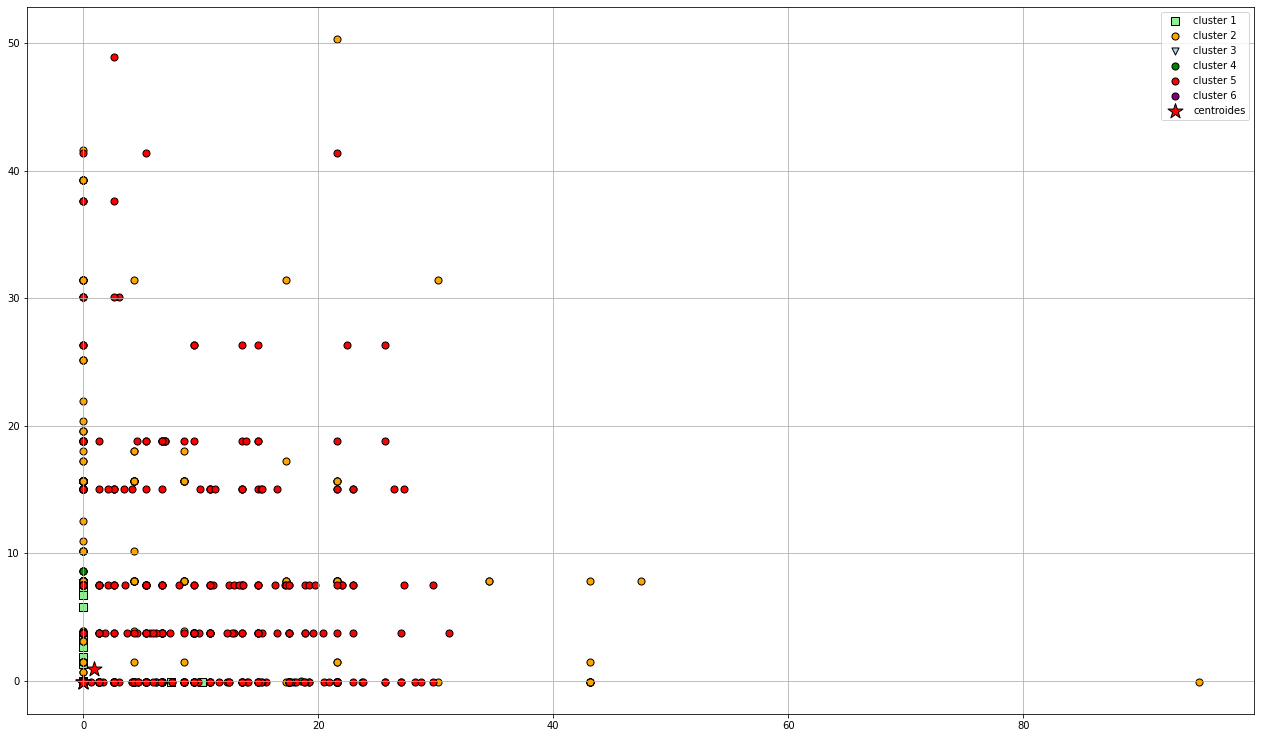

In [33]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(22,13))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 6], scaled_1[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 4, 7], scaled_1[y_km == 4, 7],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del cuarto cluster
plt.scatter(
    scaled_1[y_km == 3, 5], scaled_1[y_km == 3, 6],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 4'
)
#scatter del quinto cluster
plt.scatter(
    scaled_1[y_km == 1, 3], scaled_1[y_km == 1, 4],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 5'
)
#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 4, 6], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 6'
)

#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

# Métricas de Evaluación

El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

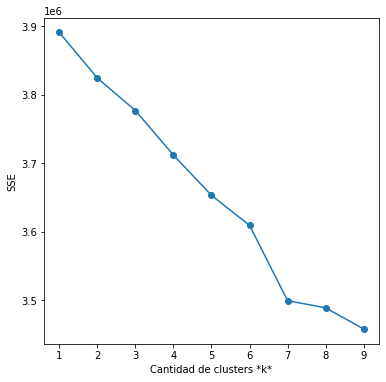

In [34]:
# Se corre el algoritmo con K entre 2 y 10 y se va guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [35]:
clases = km.labels_

In [36]:
clases.shape

(50532,)

In [37]:
print(clases)

[0 0 8 ... 5 5 5]
